In [3]:
# !pip install pytesseract

In [2]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
# import pytesseract
import matplotlib.pyplot as plt

import tensorflow as tf

In [67]:
path = 'images/puzzle1.png'
img = Image.open(path).convert('LA')

array = np.array(img)[:,:,0]

array.shape

(1200, 1200)

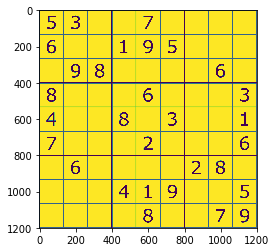

In [68]:
plt.imshow(array);

In [111]:
# array = 255-array

# divisor = array.shape[0]//9

# puzzle = []
# for i in range(9):
#     row = []
#     for j in range(9):
#         #slice image, reshape it to 28x28 (mnist reader size)
#         row.append(cv2.resize(array[i*divisor:(i+1)*divisor,
#                                     j*divisor:(j+1)*divisor][3:-3, 3:-3], 
#                               dsize=(28,28), 
#                               interpolation=cv2.INTER_CUBIC))
#     puzzle.append(row)
array = 255-array

divisor = array.shape[0]//9

puzzle = []
for i in range(9):
    row = []
    for j in range(9):
        #slice image, reshape it to 28x28 (mnist reader size)
        row.append(cv2.resize(array[i*(divisor):(i+1)*divisor,
                                    j*divisor:(j+1)*divisor][5:-3, 5:-3], 
                              dsize=(28,28), 
                              interpolation=cv2.INTER_CUBIC))
    puzzle.append(row)

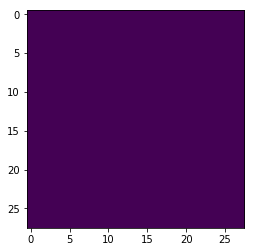

In [104]:
i,j = 0,2
plt.imshow(cv2.resize(array[i*(divisor):(i+1)*divisor,
                                    j*divisor:(j+1)*divisor][5:-3, 3:-3], 
                              dsize=(28,28), 
                              interpolation=cv2.INTER_CUBIC))

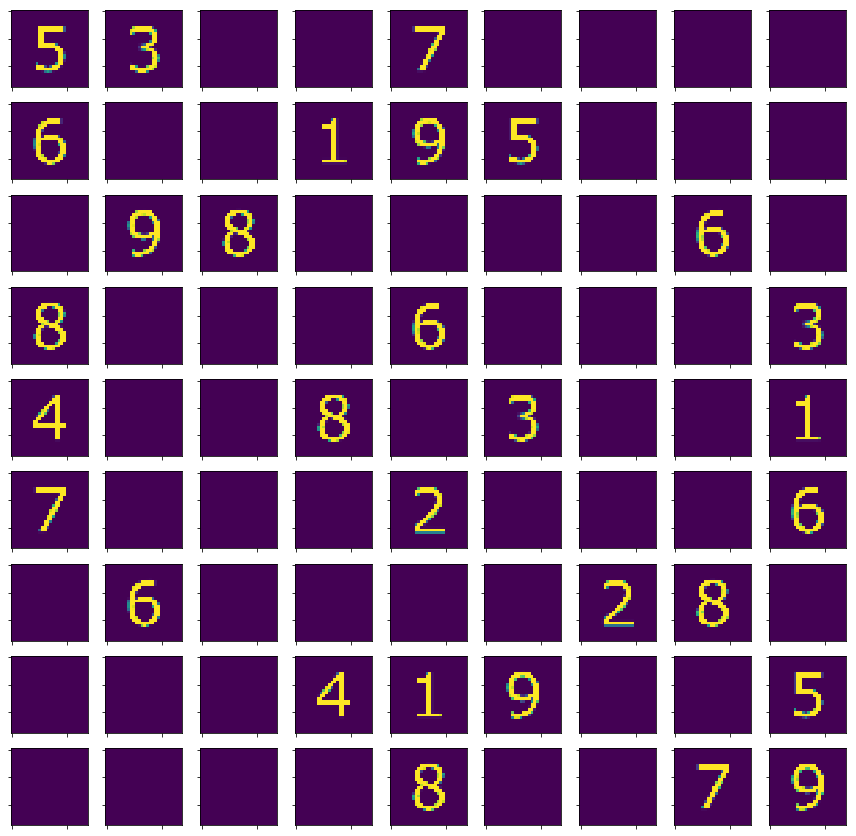

In [112]:
fig,ax=plt.subplots(9,9,figsize=(15,15))
for i in range(9):
    for j in range(9):
        ax[i][j].imshow(puzzle[i][j])
        ax[i][j].set_xticklabels([])
        ax[i][j].set_yticklabels([])


In [25]:
# for i in range(9):
#     if(i%3==0):
#         print(end=' ')
#         print('-'*23)
#     for j in range(9):
#         if(j%3==0):
#             print('|',end=' ')
#         print(pytesseract.image_to_string(puzzle[i][j]),end=' ')
#     print('|')

# print(end=' ')
# print('-'*23)

In [114]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [115]:
test_images.shape

(10000, 28, 28)

In [116]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32')/255

series = pd.Series(train_labels)
dummies = pd.get_dummies(series)

In [117]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(254, kernel_size=(3,3), input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(140, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# model.fit(train_images,
#           dummies, 
#           epochs=5,
#           validation_data = [test_images.reshape(10000,28,28,1).astype('float32')/255,
#                              pd.get_dummies(pd.Series(test_labels))])


In [18]:
# model.predict_classes(puzzle[0][2].reshape(1,28,28,1).astype('float32')/255)

In [19]:
# model.save('image_to_number_model.hdf5')

In [118]:
model.load_weights('image_to_number_model.hdf5')

In [119]:
np.mean(puzzle[0][8])

0.0

In [120]:
np.mean(puzzle[0][1])

22.258928571428573

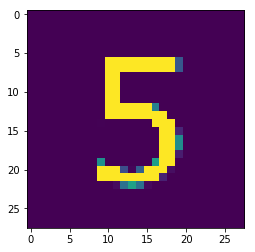

[5]


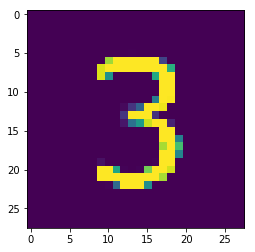

[3]


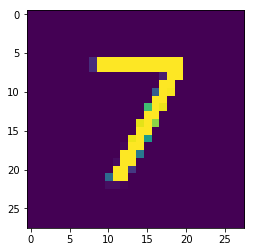

[7]


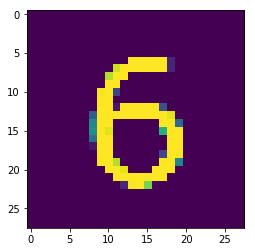

[6]


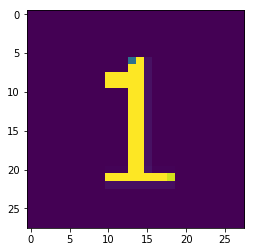

[1]


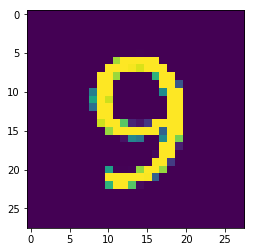

[9]


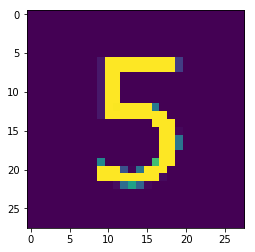

[5]


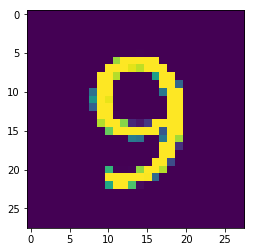

[9]


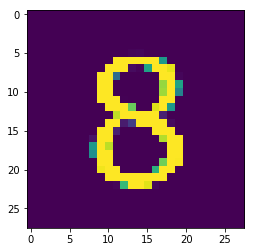

[8]


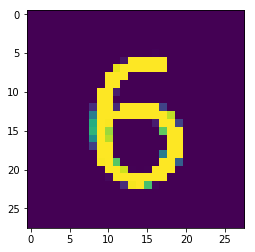

[6]


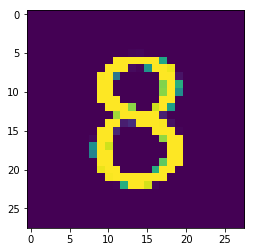

[8]


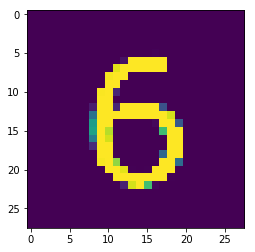

[6]


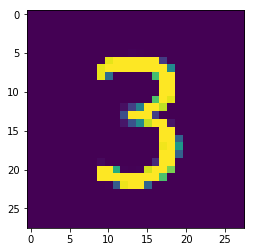

[3]


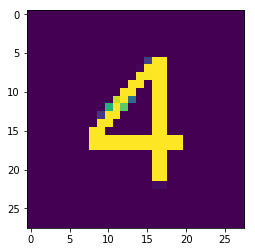

[4]


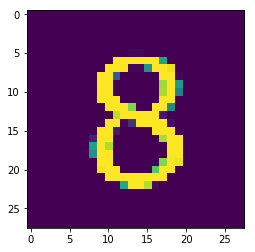

[8]


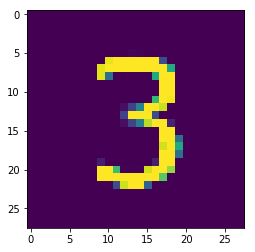

[3]


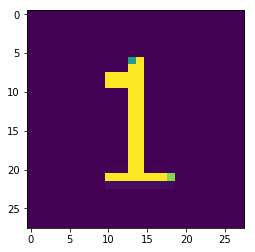

[1]


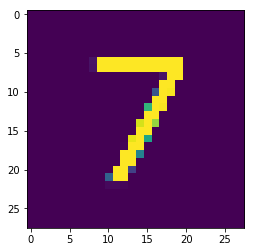

[7]


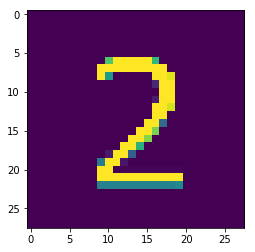

[2]


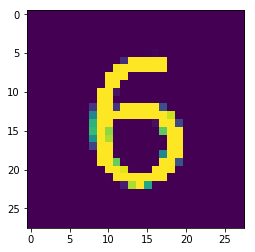

[6]


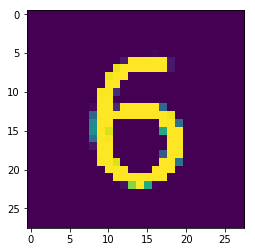

[6]


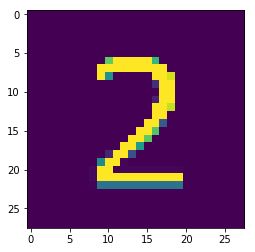

[2]


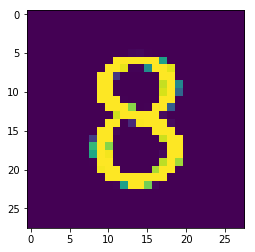

[8]


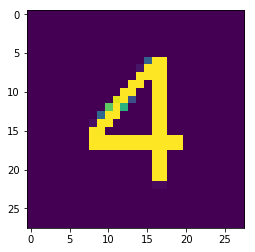

[4]


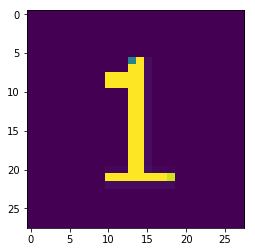

[1]


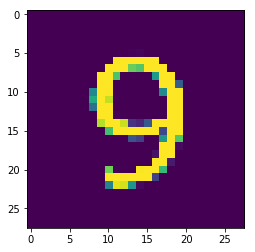

[9]


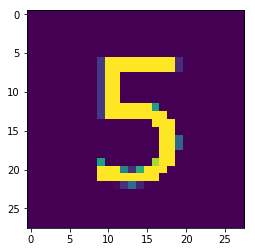

[5]


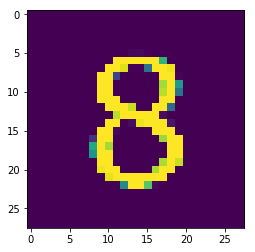

[8]


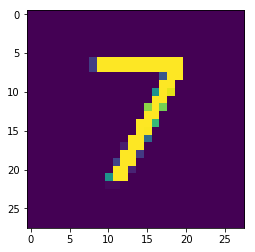

[7]


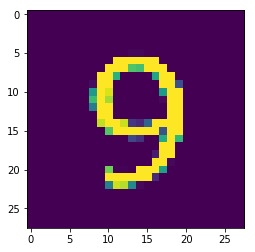

[9]
30


In [121]:
count = 0 
for row in puzzle:
    for spot in row:
        if np.mean(spot) > 6:
            count += 1
            plt.imshow(spot)
            plt.show()
            print(model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255))
            
print(count)

In [122]:
template = [
    [0 for _ in range(9)] for _ in range(9)
]

In [123]:
template

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [124]:
for i, row in enumerate(puzzle):
    for j, spot in enumerate(row):
        if np.mean(spot) > 6:
            template[i][j] = model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255)[0]

In [126]:
template

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [139]:
import SudokuSolver
SudokuSolver.SudokuSolver(template).solve()


That took 0.0010008811950683594 seconds!


[[5, 3, 4, 6, 7, 8, 9, 1, 2],
 [6, 7, 2, 1, 9, 5, 3, 4, 8],
 [1, 9, 8, 3, 4, 2, 5, 6, 7],
 [8, 5, 9, 7, 6, 1, 4, 2, 3],
 [4, 2, 6, 8, 5, 3, 7, 9, 1],
 [7, 1, 3, 9, 2, 4, 8, 5, 6],
 [9, 6, 1, 5, 3, 7, 2, 8, 4],
 [2, 8, 7, 4, 1, 9, 6, 3, 5],
 [3, 4, 5, 2, 8, 6, 1, 7, 9]]